In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [30]:
# load numpy zip
data = np.load('./data/data_10000_norm.npz')

In [31]:
X = data['arr_0'] # independent feature
y = data['arr_1'] # target value

In [32]:
X.shape, y.shape

((149, 10000), (149,))

In [33]:
X1 = X - X.mean(axis=0)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [41]:
x_pca = pca.fit_transform(X1)

In [42]:
x_pca.shape

(149, 149)

In [43]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

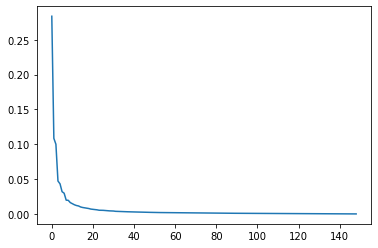

In [44]:
plt.plot(eigen_ratio)

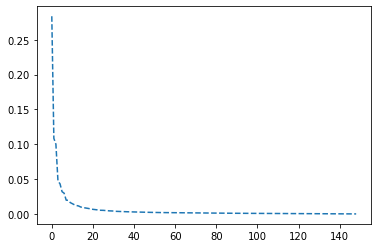

In [45]:
plt.plot(eigen_ratio,'--')

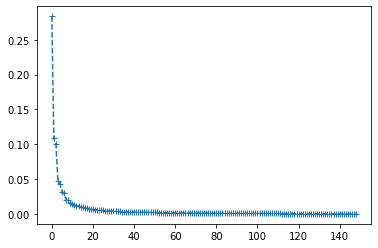

In [46]:
plt.plot(eigen_ratio,'+--')

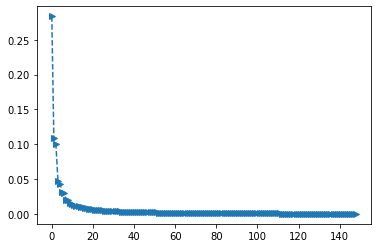

In [47]:
plt.plot(eigen_ratio,'>--')

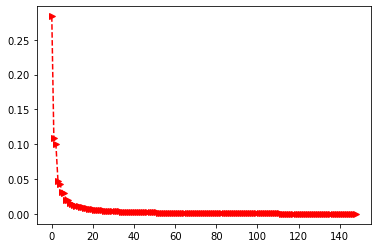

In [48]:
plt.plot(eigen_ratio,'r>--')

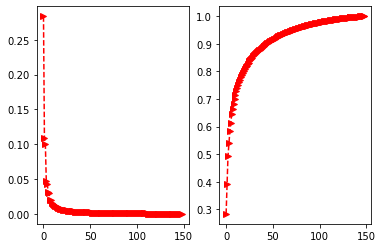

In [49]:
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200],'r>--')

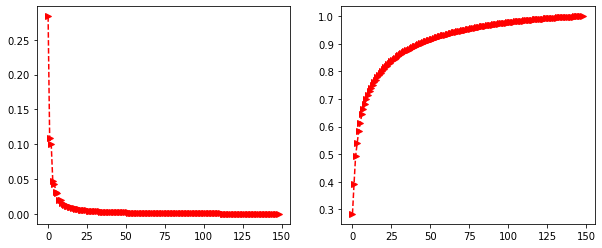

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200],'r>--')

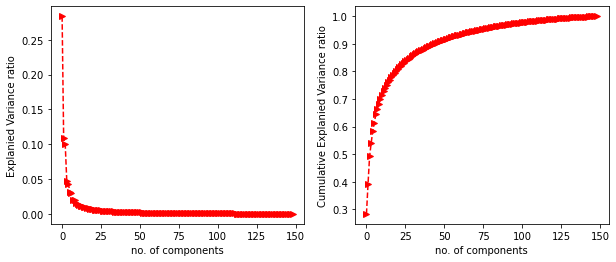

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

In [55]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [56]:
x_pca_50.shape

(149, 50)

In [57]:
# saving pca
import pickle

In [58]:
pickle.dump(pca_50,open('./data/pca_50.pickle','wb'))

In [61]:
# consider 50 compnent and inverse transfrom
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [62]:
x_pca_inv.shape

(149, 10000)

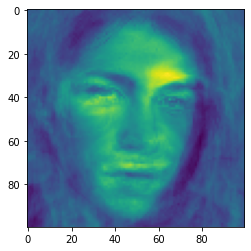

In [63]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img)

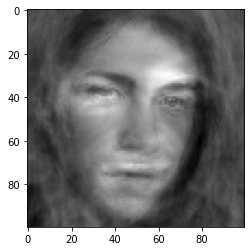

In [64]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

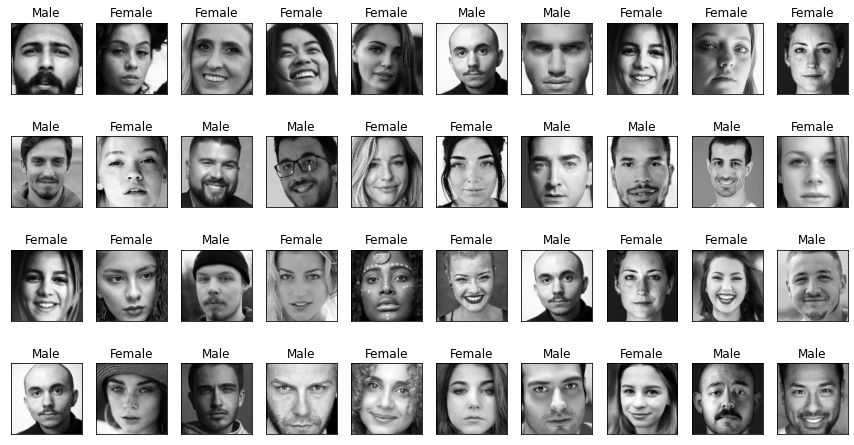

====================Eigen Images====================


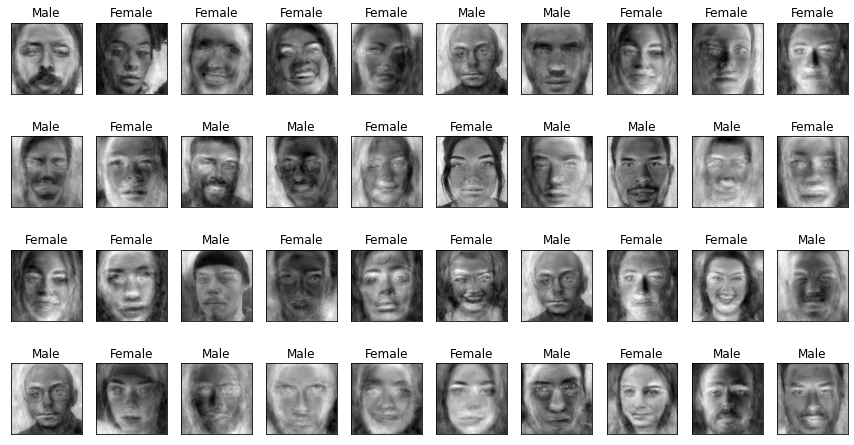

In [66]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
np.random.randint(1001)
pics = np.random.randint(0,149,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [67]:
# saving
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean())